<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8. Deep Learning</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [70]:
%run Importaciones.ipynb
%run Variables_Clases.ipynb

In [71]:
experimento_1_nor = pd.read_csv('../datos/experimento_1.csv', sep=',')
experimento_2_nor = pd.read_csv('../datos/experimento_2.csv', sep=',')
experimento_3_nor = pd.read_csv('../datos/experimento_3.csv', sep=',')
experimento_4_nor = pd.read_csv('../datos/experimento_4.csv', sep=',')
experimento_all_nor = pd.read_csv('../datos/experimento_all.csv', sep=',')

experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
experimentos_name = {'experimento_1':experimento_1_nor, 'experimento_2':experimento_2_nor, 'experimento_3':experimento_3_nor,'experimento_4':experimento_4_nor}


In [3]:
experimento_1 = experimento_1_nor.drop(['Timestamp'], axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Supongamos que 'X' son tus datos y 'y' son tus targets

y = experimento_1['Key'].values
X = experimento_1.drop(columns=['Key']).values



scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.reshape(-1,1))

# Se dividen los datos. X_train_val sera el 90% de los datos y X_test el 10%
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_norm, random_state=SEED, stratify=y, train_size=TRAIN)
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=SEED, train_size=TRAIN)

# Se dividen los datos. X_train sera el 90% de los datos de X_train_val y X_val el restante 10%
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED, stratify=y_train_val, train_size=TRAIN)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED,  train_size=TRAIN)





# Crear el modelo
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='sigmoid'))  # La capa de salida tiene una sola neurona para la regresión

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Hacer predicciones
predictions = model.predict(X_val)
#print(predictions)

# Desnormalizar las predicciones
predictions_desnorm = scaler.inverse_transform(predictions)
#print(predictions_desnorm)
# Redondear las predicciones a los valores más cercanos de tus categorías
predictions_rounded = np.round(predictions_desnorm, 0)
#print(predictions_rounded)
# Asegurarse de que las predicciones redondeadas estén dentro de tus categorías
predictions_final = np.clip(predictions_rounded, 0, 4)
print(predictions_final)

Epoch 1/50


C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1461  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1377 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1438 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1441 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1451 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1389 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1417 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1375 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1435 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1374 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1419  
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1281  
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.1370
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1419 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1344  
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [73]:
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(experimento_1)

y = experimento_1['Key'].values
X = experimento_1.drop(columns=['Key']).values


scaler = MinMaxScaler()
y_cat = scaler.fit_transform(y)

print(y_cat)


# Se dividen los datos. X_train_val sera el 90% de los datos y X_test el 10%
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_cat, random_state=SEED, stratify=y, train_size=TRAIN)
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=SEED, train_size=TRAIN)

# Se dividen los datos. X_train sera el 90% de los datos de X_train_val y X_val el restante 10%
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED, stratify=y_train_val, train_size=TRAIN)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED,  train_size=TRAIN)


# Crear el modelo
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax'))  # La capa de salida tiene tantas neuronas como categorías

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evalúa el modelo
y_pred = model.predict(X_val)
#y_pred_classes = np.argmax(y_pred, axis=1)

#accuracy = accuracy_score(y_val, y_pred_classes)
#conf_matrix = confusion_matrix(y_val, y_pred_classes)

print(y_pred)
#print("Accuracy:", accuracy)
#print("Confusion Matrix:\n", conf_matrix)


ValueError: Expected 2D array, got 1D array instead:
array=[4. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = SEED
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = SEED
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = SEED
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = SEED
            )


In [43]:

    
y = experimento_1['Key'].values
X = experimento_1.drop(columns=['Key']).values




modelo_1.fit(X=X, y=y)

modelo_2.fit(X=X, y=y)

modelo_3.fit(X=X, y=y)

modelo_4.fit(X=X, y=y)


    

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=42, solver='lbfgs')

In [ ]:
'''modelos_all= []

for exp in experimentos_nor:
    
    modelos_all.append(evaluar_holdout(exp))

datos_holdout = pd.DataFrame(modelos_all, columns=['Modelo1', 'Modelo2', 'Modelo3', 'Modelo4'])
#creo los valores nuevo para los indices de las filas 
nuevos_indices = {0: 'Exp_1', 1: 'Exp_2', 2: 'Exp_3', 3: 'Exp_4'}
# combio los valores anteriores en el dataframene con rename
datos_holdout = datos_holdout.rename(index=nuevos_indices)
'''

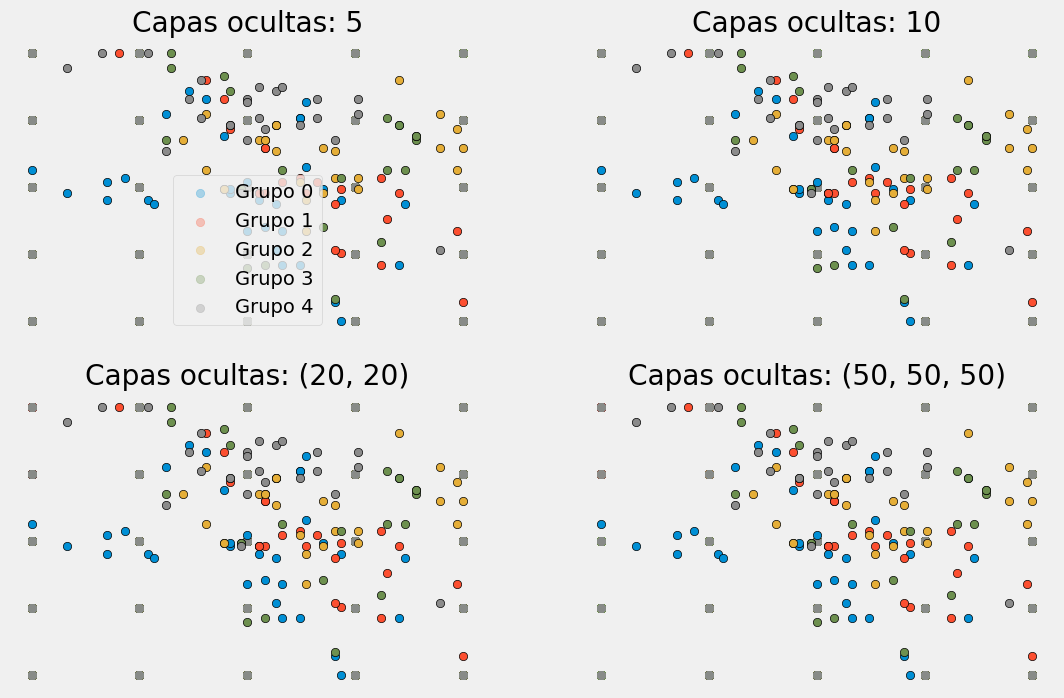

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
num_points = 5  # o cualquier otro número más pequeño que 100
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=num_points)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=num_points)
grid_x3 = np.linspace(start=min(X[:, 2]), stop=max(X[:, 2]), num=num_points)
grid_x4 = np.linspace(start=min(X[:, 3]), stop=max(X[:, 3]), num=num_points)
grid_x5 = np.linspace(start=min(X[:, 4]), stop=max(X[:, 4]), num=num_points)
grid_x6 = np.linspace(start=min(X[:, 5]), stop=max(X[:, 5]), num=num_points)
grid_x7 = np.linspace(start=min(X[:, 6]), stop=max(X[:, 6]), num=num_points)
grid_x8 = np.linspace(start=min(X[:, 7]), stop=max(X[:, 7]), num=num_points)
grid_x9 = np.linspace(start=min(X[:, 8]), stop=max(X[:, 8]), num=num_points)
grid_x10 = np.linspace(start=min(X[:, 9]), stop=max(X[:, 9]), num=num_points)

# Usa los puntos reducidos para crear el grid
xx, yy, zz, aa, bb, cc, dd, ee, ff, gg = np.meshgrid(grid_x1, grid_x2, grid_x3, grid_x4, grid_x5,
                                                      grid_x6, grid_x7, grid_x8, grid_x9, grid_x10)
X_grid = np.column_stack([xx.flatten(), yy.flatten(), zz.flatten(), aa.flatten(), bb.flatten(),
                          cc.flatten(), dd.flatten(), ee.flatten(), ff.flatten(), gg.flatten()])


for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):
    
    predicciones = modelo.predict(X_grid)
    
    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )
        
    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

In [8]:
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

clasificadores = [(MLPClassifier(max_iter=2000),"MLP"),
                  (SVC(),"SVC")]
'''
clasificadores = [(modelo_1,"Model1"),
                  (modelo_2,"Model2"),
                  (modelo_3,"Model3"),
                  (modelo_4,"Model4")]
'''
# Numero de folds
n_folds = 2

experimentos = [("Exp1", experimento_1_nor), 
                ("Exp2", experimento_2_nor), 
                ("Exp3", experimento_3_nor), 
                ("Exp4", experimento_4_nor)]



processed_datasets = []
for name, dataset in experimentos:
    y = dataset['Key'].values
    X = dataset.drop(columns=['Timestamp','Key']).values
    processed_datasets.append((name, X, y))

#Defino los rangos de parámetros para SVM
param_grid_svm = {
    'C': np.linspace(0.01, 100000000, 10),  # Rango de valores para C
    'gamma': np.linspace(0.00000001, 1000, 10)  # Rango de valores para gamma
}

# Defino los rangos de parámetros para MLP
param_grid_mlp = {
    'alpha': np.linspace(0.00001, 0.1, 10),  # Rango de valores para alpha
    'hidden_layer_sizes': [(50,), (100,), (200,), (500,), (1000,)]  # Rango de valores para neuronas en la capa oculta
}

# Funcion para validacion cruzada
def get_cv_results(clasificador, X, y, n_folds):
    cv_scores = cross_val_score(clasificador, X, y, cv=n_folds)
    return cv_scores.mean()

# Funcion para validacion cruzada de Pipeline
def get_pipeline_results(clasificador, X, y, n_folds):
    #X = add_random_permutations(X)
    pipeline = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=SEED), threshold="median")),
        ('classification', clasificador)
    ])
    cv_scores = cross_val_score(pipeline, X, y, cv=n_folds)

    return cv_scores.mean()

# Genero las cuadriculas para a posteriori hallar los mejores parametros
grid_search_mlp = GridSearchCV((MLPClassifier(max_iter=2000)), param_grid_mlp, cv=n_folds)
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=n_folds)

clasificadores[0] = clasificadores[0] + (grid_search_mlp,)
clasificadores[1] = clasificadores[1] + (grid_search_svm,)                              


inicio_tiempo = time.time()

# Realizo experimentos
resultados_opt = []
comparar = np.zeros(len(experimentos)*2)
comparador = {}

for clasificador, clasi_name, clasi_opt in clasificadores:
    clasi_resultados = {}

    for dataset_name, X, y in processed_datasets:
        # Se dividen los datos. X_train_val sera el 90% de los datos y X_test el 10%
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=SEED, stratify=y, train_size=TRAIN)

        # Se dividen los datos. X_train sera el 90% de los datos de X_train_val y X_val el restante 10%
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED, stratify=y, train_size=TRAIN)
        
       
        #Experimento 2
        clasi_opt.fit(X_train, y_train)
        print(clasi_name)
        print(clasi_opt.best_params_) #imprimo los mejores parametros solo por curiosidad
        optimized_scores = get_pipeline_results(clasi_opt.best_estimator_, X_val, y_val, n_folds)
        
        # Almaceno los resultados de los experimentos
        #clasi_resultados[dataset_name + '_Sin_Opt'] = pipe_scores
        clasi_resultados[dataset_name + '_Con_Opt'] = optimized_scores
        
    
    # Almaceno los resultados
    resultados_opt.append(clasi_resultados)

fin_tiempo = time.time()

tiempo_utilizado = fin_tiempo - inicio_tiempo

# Convierto el tiempo a horas, minutos y segundos para saber cuanto tarda la ejecucion
horas = int(tiempo_utilizado // 3600)
minutos = int((tiempo_utilizado % 3600) // 60)
segundos = int(tiempo_utilizado % 60)
print(f"Tiempo: {horas} : {minutos} : {segundos}")

# Creo el dataframe
resultados_opt_df = pd.DataFrame(resultados_opt, index=['MPL', 'SVC'])
                               
                               
#formateo las columnas e index
resultados_opt_df.columns = pd.MultiIndex.from_tuples([
                                        ("Exp1","Pipe_Opt"),
                                        ("Exp2","Pipe_Opt"),
                                        ("Exp3","Pipe_Opt"),
                                        ("Exp4","Pipe_Opt")])


display(resultados_opt_df)


MLP
{'alpha': 0.08889000000000001, 'hidden_layer_sizes': (100,)}
MLP
{'alpha': 0.1, 'hidden_layer_sizes': (500,)}
MLP
{'alpha': 0.04445000000000001, 'hidden_layer_sizes': (1000,)}
MLP
{'alpha': 1e-05, 'hidden_layer_sizes': (100,)}
SVC
{'C': 33333333.34, 'gamma': 1e-08}
SVC
{'C': 0.01, 'gamma': 1e-08}
SVC
{'C': 11111111.12, 'gamma': 111.11111111999999}
SVC
{'C': 22222222.23, 'gamma': 1e-08}
Tiempo: 0 : 13 : 24


,Exp1,Exp2,Exp3,Exp4
,Pipe_Opt,Pipe_Opt,Pipe_Opt,Pipe_Opt
MPL,0.083333,0.125,0.30,0.35
SVC,0.226190,0.125,0.25,0.30


In [3]:
def get_acc_results(clasificador, X, y, n_folds):
    cv_scores = accuracy_score(X, y)
    report = classification_report(X, y)
    matriz_confusion = confusion_matrix(X, y)
    
    return cv_scores.mean()


def get_cv_results(clasificador, X, y, n_folds):
    cv_scores = cross_val_score(clasificador, X, y, cv=n_folds)
    return cv_scores.mean()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV


model = MLPClassifier(max_iter=200)

n_folds = 10

experimentos = [("Exp1", experimento_1_nor), 
                ("Exp2", experimento_2_nor), 
                ("Exp3", experimento_3_nor), 
                ("Exp4", experimento_4_nor),
                ("Exp5", experimento_all_nor)]


# Defino los rangos de parámetros para MLP
param_grid_mlp = {
    'alpha': np.linspace(0.00001, 0.1, 10),  # Rango de valores para alpha
    'hidden_layer_sizes': [(50,), (100,), (200,), (500,), (1000,)]  # Rango de valores para neuronas en la capa oculta
}

grid_search_mlp = GridSearchCV(model, param_grid_mlp, cv=n_folds)

inicio_tiempo = time.time()

for dataset_name, dataset in experimentos:
    
    
    y = dataset['Key'].values
    X = dataset.drop(columns=['Timestamp','Key']).values
   
    
    # Se dividen los datos. X_train_val sera el 90% de los datos y X_test el 10%
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=SEED, train_size=TRAIN)
    
    # Se dividen los datos. X_train sera el 90% de los datos de X_train_val y X_val el restante 10%
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED,  train_size=TRAIN)
    
    
    # Entrenar modelo
    grid_search_mlp.fit(X_train, y_train)
          
    y_predict_model = grid_search_mlp.best_estimator_.predict(X_val)
    
    
    print('y_val')
    print(y_val)
    print('y_predict_model')
    print(y_predict_model)
    
    #scores = get_cv_results(grid_search_mlp.best_estimator_, y_val, y_predict_model, n_folds)
    
    mlp = accuracy_score(y_val, y_predict_model)
    
    print(dataset_name)

    print('accuracy_score:')
    print(mlp)
        
    report = classification_report(y_val, y_predict_model)
    print('Classification Report:')
    print(report)
        
    matriz_confusion = confusion_matrix(y_val, y_predict_model)
    print('Matrix:')
    print(matriz_confusion)
    print('********************************************************')


fin_tiempo = time.time()

tiempo_utilizado = fin_tiempo - inicio_tiempo

# Convierto el tiempo a horas, minutos y segundos para saber cuanto tarda la ejecucion
horas = int(tiempo_utilizado // 3600)
minutos = int((tiempo_utilizado % 3600) // 60)
segundos = int(tiempo_utilizado % 60)
print(f"Tiempo: {horas} : {minutos} : {segundos}")

In [79]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import pickle
from IPython.display import clear_output

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint

from tensorflow.keras.layers import Reshape, GlobalMaxPool1D, TimeDistributed, Input
from tensorflow.keras.models import Model, load_model

# Plot del training loss y accuracy
def print_chart(title, xaxis, yaxis, lines_values, lines_titles):
    """
    Visualización de la pérdida
    IN: title - título de la gráfica
        xaxis - título del eje X
        yaxis - título del eje Y
        lines - lista de series de valores
    """
    for line in lines_values:
        plt.plot(line)
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.legend(lines_titles, loc='best')
    plt.show()
    

class PlotLearning(Callback):
    """
    Callback para plotear las métricas durante el entrenamiento.
    """
    def __init__(self, showLR=False):
      self.showLR = showLR              

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        metric = [x for x in logs if ('val' not in x) and ('lr' not in x)]
        if self.showLR:
          metric.append('lr')
        
        f, axs = plt.subplots(1,len(metric),figsize=(10,4))
        clear_output(wait=True)
        for i,ax in enumerate(axs):
          ax.plot(range(1, epoch + 2), self.metrics[metric[i]],'o--',label=metric[i])
          try:
            ax.plot(range(1, epoch + 2), self.metrics['val_' + metric[i]], 'o--', label='val_' + metric[i])
          except:
            pass
          ax.set_xlabel('# epochs')
          ax.set_ylabel(metric[i])
          ax.legend()
          ax.grid()

        plt.tight_layout()
        plt.show()
        
class TimerCallback(Callback):
    
    def on_train_begin(self, logs={}):
        self.times = []
        self.start_time = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.start_time)
        print(f"Tiempo requerido: {self.times[-1]:.2f} segundos.")
        
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint
import os

In [80]:
experimento_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Attention   130 non-null    float64
 1   Meditation  130 non-null    float64
 2   Delta       130 non-null    float64
 3   Theta       130 non-null    float64
 4   LowAlpha    130 non-null    float64
 5   HighAlpha   130 non-null    float64
 6   LowBeta     130 non-null    float64
 7   HighBeta    130 non-null    float64
 8   LowGamma    130 non-null    float64
 9   HighGamma   130 non-null    float64
 10  Key         130 non-null    float64
dtypes: float64(11)
memory usage: 11.3 KB


In [86]:
#model_srnn = Sequential([SimpleRNN(128, input_shape=(1, 10)), Dense(1, activation='sigmoid')])

model_srnn = Sequential([
    Flatten(input_shape=(11,)),  # Aplanar los datos de entrada
    Reshape((1, 11)),  # Cambiar la forma para que sea (None, 1, 10)
    SimpleRNN(128),  # Capa RNN
    Dense(5, activation='softmax')  # Capa de salida con activación softmax para num_classes clases
    ])

# Compilar el modelo
model_srnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model_srnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
plot_learning = PlotLearning()
timer_callback = TimerCallback()
reduce_rl = ReduceLROnPlateau(patience=5, monitor='loss')
model_checkpoint = ModelCheckpoint('weights/simple_rnn.keras', monitor='val_loss', save_best_only=True, mode='min')

In [87]:
X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(experimento_1_nor)

#print(X_train)
#print(X_val)
print(y_train)
print(y_val)

[0. 0. 4. 3. 3. 4. 2. 0. 2. 1. 4. 0. 2. 1. 3. 4. 0. 3. 4. 1. 2. 4. 4. 0.
 0. 0. 2. 4. 4. 3. 2. 3. 0. 4. 3. 3. 0. 2. 1. 3. 4. 2. 3. 3. 4. 1. 0. 2.
 0. 0. 0. 2. 4. 2. 4. 0. 2. 2. 1. 3. 0. 4. 0. 3. 2. 1. 0. 1. 0. 1. 4. 4.
 0. 2. 2. 2. 1. 0. 3. 0. 0. 0. 0. 0. 0. 3. 1. 2. 1. 3. 1. 1. 4. 2. 0. 1.
 1. 1. 0. 3. 3. 0. 0. 1. 4.]
[2. 0. 1. 0. 4. 0. 3. 0. 2. 1. 3. 4.]


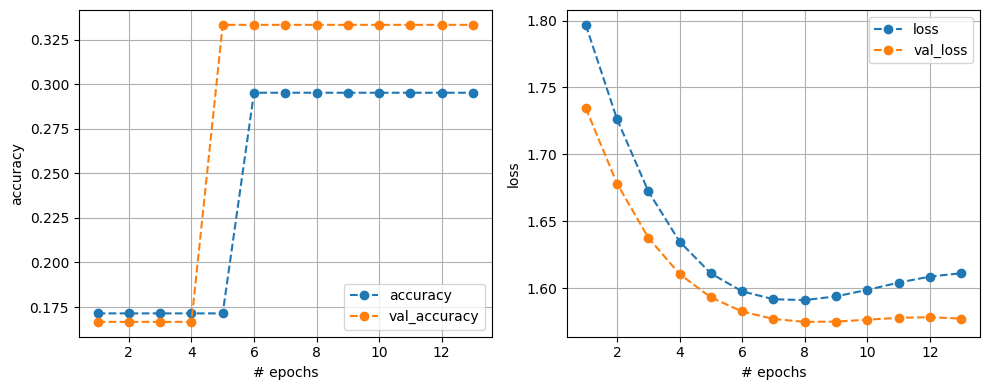

Tiempo requerido: 18.11 segundos.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step - accuracy: 0.2952 - loss: 1.6111 - val_accuracy: 0.3333 - val_loss: 1.5772 - learning_rate: 0.0010
Epoch 13: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
***
[[0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]
 [0.39380315 0.12906124 0.16636203 0.12682031 0.18395332]]
***


'\nprint (y_pred_classes)\nprint(\'***\')\n\n# Redondea las predicciones a 0 o 1 (ya que parece que estás trabajando en un problema de clasificación binaria)\n#y_pred_rounded = np.round(y_pred)\n\n# Calcula la precisión\naccuracy = accuracy_score(y_val, y_pred_classes)\nprint("Accuracy:", accuracy)\n\n# Muestra el informe de clasificación\nprint("Classification Report:")\nprint(classification_report(y_val, y_pred_classes))\n\n# Muestra la matriz de confusión\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_val, y_pred_classes))   \n    \n    \n\n \nprint(\'********************************************************\')\n\n\nfin_tiempo = time.time()\n\ntiempo_utilizado = fin_tiempo - inicio_tiempo\n\n# Convierto el tiempo a horas, minutos y segundos para saber cuanto tarda la ejecucion\nhoras = int(tiempo_utilizado // 3600)\nminutos = int((tiempo_utilizado % 3600) // 60)\nsegundos = int(tiempo_utilizado % 60)\nprint(f"Tiempo: {horas} : {minutos} : {segundos}")\n\n'

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Softmax
from tensorflow.keras.callbacks import EarlyStopping

n_folds = CV

# Entrenar el modelo
simple_rnn_trained = model_srnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data= (X_val, y_val), callbacks=[early_stopping, plot_learning, timer_callback, reduce_rl, model_checkpoint])

y_pred = model_srnn.predict(X_val)
print('***')
print(y_pred)
print('***')
y_pred_classes = np.argmax(y_pred, axis=1)

'''
print (y_pred_classes)
print('***')

# Redondea las predicciones a 0 o 1 (ya que parece que estás trabajando en un problema de clasificación binaria)
#y_pred_rounded = np.round(y_pred)

# Calcula la precisión
accuracy = accuracy_score(y_val, y_pred_classes)
print("Accuracy:", accuracy)

# Muestra el informe de clasificación
print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

# Muestra la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_classes))   
    
    

 
print('********************************************************')


fin_tiempo = time.time()

tiempo_utilizado = fin_tiempo - inicio_tiempo

# Convierto el tiempo a horas, minutos y segundos para saber cuanto tarda la ejecucion
horas = int(tiempo_utilizado // 3600)
minutos = int((tiempo_utilizado % 3600) // 60)
segundos = int(tiempo_utilizado % 60)
print(f"Tiempo: {horas} : {minutos} : {segundos}")

'''

In [89]:

print(simple_rnn_trained.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3077 - loss: 1.5861
Loss: 1.5860707759857178
Accuracy: 0.3076923191547394


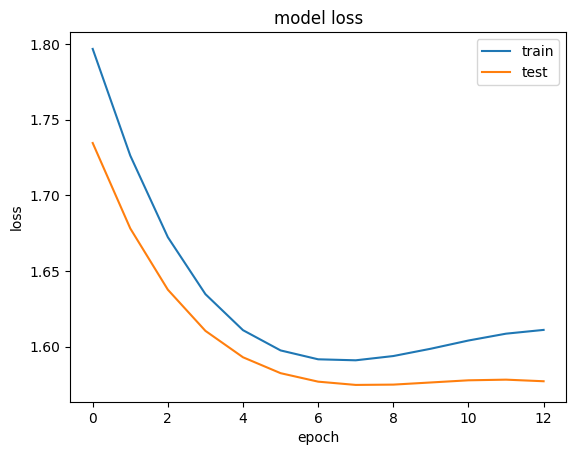

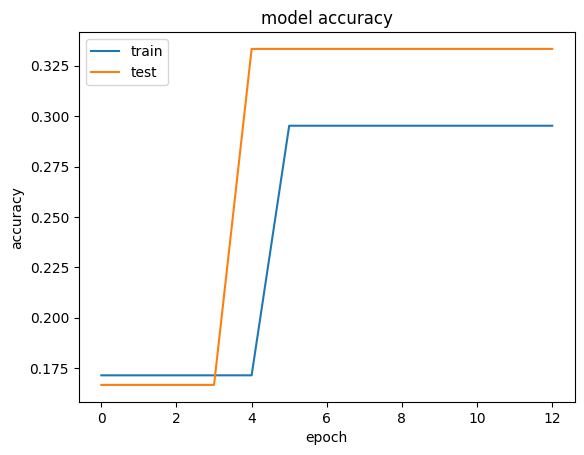

In [90]:
    simple_rnn_loss, simple_rnn_accuracy = model_srnn.evaluate(X_test, y_test)
    print(f'Loss: {simple_rnn_loss}')
    print(f'Accuracy: {simple_rnn_accuracy}')

    print_chart("model loss", "epoch", "loss", [simple_rnn_trained.history['loss'], simple_rnn_trained.history['val_loss']], ['train', 'test'])
    print_chart("model accuracy", "epoch", "accuracy", [simple_rnn_trained.history['accuracy'], simple_rnn_trained.history['val_accuracy']], ['train', 'test'])

